Machine Learning Exam

This is a classification task.
The two different machine learning models chosen are Linear SVM and Random forest

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

The dataset is loaded and preprocessed

In [83]:

# Load the dataset
data = pd.read_csv('C:/Users/User/Documents/GitHub/ML_exam/ai4i2020.csv')

# Display the first 5 rows of the data
print(data.head())
print(data.info())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [84]:
# Check if there are missing values in the dataset
if data.isnull().values.any():
    print("Missing values found")
else:
    print("No missing values found")

# Preprocess the data
X = data.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'PWF', 'TWF', 'HDF', 'OSF', 'RNF'])
y = data['Machine failure']
class_distribution = y.value_counts()
print(class_distribution)


No missing values found
Machine failure
0    9661
1     339
Name: count, dtype: int64


There is imbalance in the dataset

Creating a pairplot to visualize relationships between variables

In [85]:

dataplot = data.drop(columns=['UDI', 'Product ID', 'Type', 'PWF', 'TWF', 'HDF', 'OSF', 'RNF'])
#sns.pairplot(dataplot, hue='Machine failure')

As seen in the pairplot, the features are normally distributed

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
print(dataplot.describe())

       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  Machine failure  
count  10000.000000     10000.000000     10000.000000  
mean      39.986910       107.951000         0.033900  
std        9.968934        63.654147         0.180981  
min        3.800000         0.000000         0.000000  
25%     

There is a large difference between min and max in some of the features. That calls for standardizing features

In [104]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initializing the SVM classifier using both linear and rbf kernels to see which one is best

In [88]:
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')

Performing k-fold cross-validation 

In [89]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [90]:
# Cross-validation for linear kernel
linear_cv_scores = cross_val_score(linear_svm, X_train, y_train, cv=kf)
print(f"Linear Kernel - Cross-validation scores: {linear_cv_scores}")
print(f"Linear Kernel - Mean cross-validation score: {linear_cv_scores.mean()}")

# Cross-validation for RBF kernel
rbf_cv_scores = cross_val_score(rbf_svm, X_train, y_train, cv=kf)
print(f"RBF Kernel - Cross-validation scores: {rbf_cv_scores}")
print(f"RBF Kernel - Mean cross-validation score: {rbf_cv_scores.mean()}")

Linear Kernel - Cross-validation scores: [0.975    0.971875 0.9675   0.9575   0.95875 ]
Linear Kernel - Mean cross-validation score: 0.9661249999999999
RBF Kernel - Cross-validation scores: [0.9775  0.97875 0.97125 0.96625 0.9675 ]
RBF Kernel - Mean cross-validation score: 0.9722500000000001


Now training the SVM with the linear kernel on the entire dataset and evaluating it on the test set. Using the linear kernel is less heavy to compute

In [91]:
rbf_svm.fit(X_train, y_train)

SVC()

Now for the prediction

In [92]:
y_pred = rbf_svm.predict(X_test)

And the evaluation

Accuracy: 0.985
Precision: 0.8958333333333334
Recall: 0.6323529411764706
F1 Score: 0.7413793103448276
ROC AUC: 0.814882474729022
Confusion Matrix:
[[1927    5]
 [  25   43]]


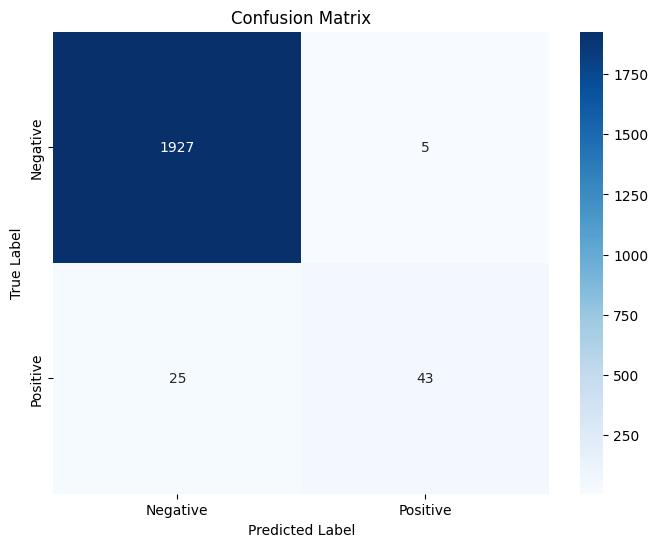

In [106]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
# Visualization function
def plot_confusion_matrix(conf_matrix, labels=['Negative', 'Positive']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Visualize the confusion matrix
plot_confusion_matrix(conf_matrix)

The next model implemented is Random Forest with bagging and feature randomness

In [94]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predictions

In [95]:
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # For ROC-AUC score


Evaluating the Random Forest model (accuracy, precision, recall, f1-score, ROC-AUC)

In [96]:
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_pred_prob),
}
print(metrics)

{'Accuracy': 0.985, 'Precision': 0.8958333333333334, 'Recall': 0.6323529411764706, 'F1 Score': 0.7413793103448276, 'ROC AUC': 0.9648223419802705}


Making a confusion matrix

In [97]:

# Confusion Matrix: Table showing correct and incorrect predictions by class
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[1927    5]
 [  25   43]]


Feature importance. This shows how much each feature contributes to the model's decisions

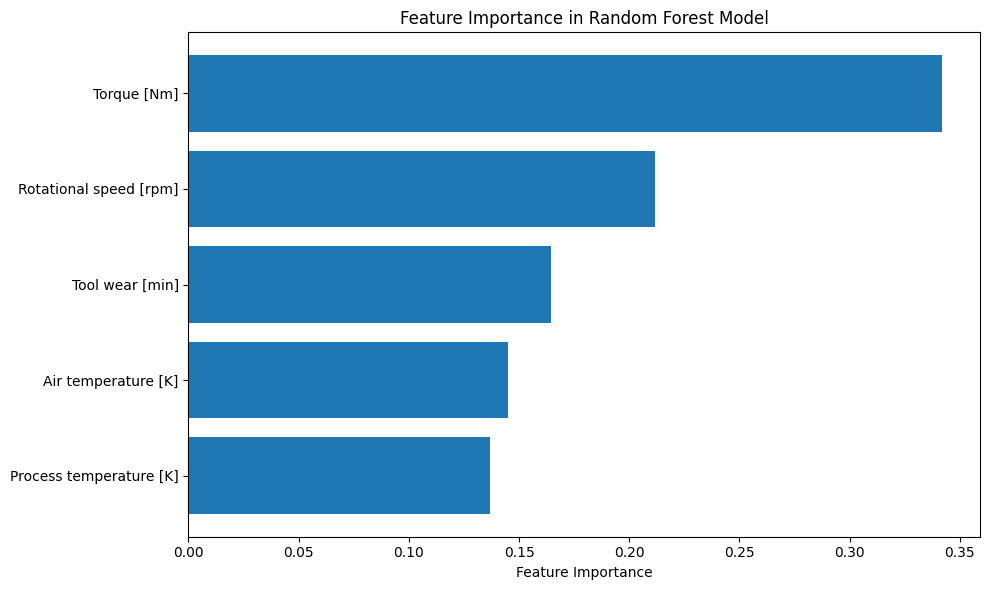


Feature Importance:
Process temperature [K]: 0.1368
Air temperature [K]: 0.1452
Tool wear [min]: 0.1643
Rotational speed [rpm]: 0.2117
Torque [Nm]: 0.3420


In [98]:

feature_importance = rf_model.feature_importances_
feature_names = data.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure']).columns


sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# Print feature importance
print("\nFeature Importance:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

In [99]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(f"Single Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
conf_matrix = confusion_matrix(y_test, dt_pred)
print(conf_matrix)


Single Decision Tree Accuracy: 0.9780
[[1912   20]
 [  24   44]]
